In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

In [2]:
# Assuming merged_data_5 is the file path
merged_data_5 = 'merged_data_5.xlsx'

# Read data from Excel file into DataFrame
new_data = pd.read_excel(merged_data_5)

In [3]:
new_data.set_index('YearMonth', inplace=True)

In [4]:
new_data_copy = new_data[['RON 95', 'RON 97', 'DIESEL','selling_gold_price','buying_gold_price','Overnight_Interest_Rate']].copy()

In [5]:
new_data_copy

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2017-03,2.13,2.41,2.11,5803.65,5566.04,3.00
2017-04,2.22,2.50,2.15,5944.58,5702.42,3.00
2017-05,2.08,2.36,2.01,5707.10,5480.76,3.00
2017-06,1.99,2.25,1.91,5730.11,5506.28,2.99
2017-07,1.98,2.23,1.96,5624.14,5406.38,2.98
...,...,...,...,...,...,...
2023-03,2.05,3.35,2.15,9048.91,8689.61,2.74
2023-04,2.05,3.35,2.15,9386.67,9014.83,2.74
2023-05,2.05,3.35,2.15,9536.10,9162.00,2.97


In [6]:
#################### hybrid modelling with 0.6 train data #######################

In [7]:
# Applying feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled = scaler.fit_transform(new_data_copy.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=list(new_data_copy.columns))
target_scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[['RON 95', 'RON 97', 'DIESEL','selling_gold_price','buying_gold_price','Overnight_Interest_Rate']] = target_scaler.fit_transform(new_data_copy[['RON 95', 'RON 97', 'DIESEL','selling_gold_price','buying_gold_price','Overnight_Interest_Rate']].to_numpy())
df_scaled = df_scaled.astype(float)

In [8]:
df_scaled

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
0,0.828571,0.263158,0.752941,0.136038,0.133133,0.843137
1,0.914286,0.291022,0.800000,0.168513,0.165848,0.843137
2,0.780952,0.247678,0.635294,0.113790,0.112675,0.843137
3,0.695238,0.213622,0.517647,0.119092,0.118797,0.836601
4,0.685714,0.207430,0.576471,0.094673,0.094833,0.830065
...,...,...,...,...,...,...
72,0.752381,0.554180,0.800000,0.883853,0.882424,0.673203
73,0.752381,0.554180,0.800000,0.961684,0.960439,0.673203
74,0.752381,0.554180,0.800000,0.996117,0.995742,0.823529
75,0.752381,0.560372,0.800000,1.000000,1.000000,0.836601


In [9]:
# Single step dataset preparation
def singleStepSampler(df, window):
    xRes = []
    yRes = []
    for i in range(0, len(df) - window):
        res = []
        for j in range(0, window):
            r = []
            for col in df.columns:
                r.append(df[col][i + j])
            res.append(r)
        xRes.append(res)
        yRes.append(df[['RON 95', 'RON 97', 'DIESEL','selling_gold_price','buying_gold_price','Overnight_Interest_Rate']].iloc[i + window].values)
    return np.array(xRes), np.array(yRes)

In [10]:
# Dataset splitting
SPLIT = 0.6
(xVal, yVal) = singleStepSampler(df_scaled, 30)
X_train = xVal[:int(SPLIT * len(xVal))]
y_train = yVal[:int(SPLIT * len(yVal))]
X_test = xVal[int(SPLIT * len(xVal)):]
y_test = yVal[int(SPLIT * len(yVal)):]

In [11]:
X_train

array([[[0.82857143, 0.26315789, 0.75294118, 0.13603831, 0.13313263,
         0.84313725],
        [0.91428571, 0.29102167, 0.8       , 0.1685132 , 0.16584787,
         0.84313725],
        [0.78095238, 0.24767802, 0.63529412, 0.11379002, 0.11267541,
         0.84313725],
        ...,
        [0.78095238, 0.28482972, 0.83529412, 0.18287147, 0.18297791,
         0.82352941],
        [0.78095238, 0.31578947, 0.83529412, 0.22481485, 0.22498621,
         0.83660131],
        [0.78095238, 0.29411765, 0.83529412, 0.33387408, 0.33407537,
         0.83006536]],

       [[0.91428571, 0.29102167, 0.8       , 0.1685132 , 0.16584787,
         0.84313725],
        [0.78095238, 0.24767802, 0.63529412, 0.11379002, 0.11267541,
         0.84313725],
        [0.6952381 , 0.21362229, 0.51764706, 0.11909228, 0.11879723,
         0.83660131],
        ...,
        [0.78095238, 0.31578947, 0.83529412, 0.22481485, 0.22498621,
         0.83660131],
        [0.78095238, 0.29411765, 0.83529412, 0.33387408, 0.334

In [12]:
y_train

array([[0.78095238, 0.32817337, 0.83529412, 0.34393017, 0.34398014,
        0.81699346],
       [0.78095238, 0.33436533, 0.83529412, 0.32656015, 0.32694845,
        0.81045752],
       [0.78095238, 0.33126935, 0.83529412, 0.29529272, 0.29547821,
        0.82352941],
       [0.78095238, 0.32817337, 0.83529412, 0.2986893 , 0.29879819,
        0.81699346],
       [0.78095238, 0.3126935 , 0.83529412, 0.35370282, 0.35395207,
        0.77777778],
       [0.77142857, 0.25386997, 0.77647059, 0.42278888, 0.42290162,
        0.67320261],
       [0.35238095, 0.11455108, 0.41176471, 0.47620551, 0.47534963,
        0.52287582],
       [0.        , 0.        , 0.        , 0.58759903, 0.58559743,
        0.51633987],
       [0.05714286, 0.01857585, 0.        , 0.63169926, 0.6303308 ,
        0.22875817],
       [0.3047619 , 0.09907121, 0.32941176, 0.61622109, 0.61509343,
        0.18300654],
       [0.40952381, 0.13312693, 0.44705882, 0.71113175, 0.71104421,
        0.05228758],
       [0.4       , 0

In [13]:
X_test

array([[[0.78095238, 0.31578947, 0.83529412, 0.22481485, 0.22498621,
         0.83660131],
        [0.78095238, 0.29411765, 0.83529412, 0.33387408, 0.33407537,
         0.83006536],
        [0.78095238, 0.32817337, 0.83529412, 0.34393017, 0.34398014,
         0.81699346],
        ...,
        [0.75238095, 0.40557276, 0.8       , 0.60564883, 0.60571641,
         0.01960784],
        [0.75238095, 0.46749226, 0.8       , 0.65857694, 0.65912875,
         0.01960784],
        [0.75238095, 0.44582043, 0.8       , 0.64307112, 0.64320052,
         0.01960784]],

       [[0.78095238, 0.29411765, 0.83529412, 0.33387408, 0.33407537,
         0.83006536],
        [0.78095238, 0.32817337, 0.83529412, 0.34393017, 0.34398014,
         0.81699346],
        [0.78095238, 0.33436533, 0.83529412, 0.32656015, 0.32694845,
         0.81045752],
        ...,
        [0.75238095, 0.46749226, 0.8       , 0.65857694, 0.65912875,
         0.01960784],
        [0.75238095, 0.44582043, 0.8       , 0.64307112, 0.643

In [14]:
y_test

array([[0.75238095, 0.46749226, 0.8       , 0.66146426, 0.66210809,
        0.02614379],
       [0.75238095, 0.51393189, 0.8       , 0.70495615, 0.70525823,
        0.01960784],
       [0.75238095, 0.69040248, 0.8       , 0.79894738, 0.79951784,
        0.01960784],
       [0.75238095, 0.70588235, 0.8       , 0.81982459, 0.82026051,
        0.01960784],
       [0.75238095, 0.85448916, 0.8       , 0.78010259, 0.78031281,
        0.14379085],
       [0.75238095, 1.        , 0.8       , 0.77529576, 0.77566627,
        0.18300654],
       [0.75238095, 0.96904025, 0.8       , 0.68539471, 0.68607959,
        0.31372549],
       [0.75238095, 0.87616099, 0.8       , 0.72647627, 0.72731307,
        0.33986928],
       [0.75238095, 0.79876161, 0.8       , 0.66780347, 0.66862091,
        0.47058824],
       [0.75238095, 0.73993808, 0.8       , 0.70964085, 0.71007988,
        0.50980392],
       [0.75238095, 0.73993808, 0.8       , 0.74330938, 0.7420059 ,
        0.65359477],
       [0.75238095, 0

In [15]:
# Define the Hybrid LSTM-GRU Model
def build_hybrid_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(GRU(50, return_sequences=False))
    model.add(Dropout(0.1))
    model.add(Dense(6, activation='linear'))
    return model

In [16]:
# Prepare the input shape from the training data
input_shape = (X_train.shape[1], X_train.shape[2])

In [17]:
# Build the model
model = build_hybrid_model(input_shape)

In [18]:
# Compile the model
model.compile(loss='mean_squared_error', metrics=['MAE'], optimizer='adam')

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 100)           42800     
                                                                 
 gru (GRU)                   (None, 50)                22800     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 6)                 306       
                                                                 
Total params: 65906 (257.45 KB)
Trainable params: 65906 (257.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Fit the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
1/1 [==============================] - 1s 1s/step - loss: 0.3190 - MAE: 0.4874 - val_loss: 0.4480 - val_MAE: 0.6393
Epoch 2/10
1/1 [==============================] - 0s 25ms/step - loss: 0.2464 - MAE: 0.4237 - val_loss: 0.3521 - val_MAE: 0.5643
Epoch 3/10
1/1 [==============================] - 0s 27ms/step - loss: 0.1913 - MAE: 0.3660 - val_loss: 0.2650 - val_MAE: 0.4862
Epoch 4/10
1/1 [==============================] - 0s 25ms/step - loss: 0.1536 - MAE: 0.3249 - val_loss: 0.1872 - val_MAE: 0.4017
Epoch 5/10
1/1 [==============================] - 0s 27ms/step - loss: 0.1033 - MAE: 0.2677 - val_loss: 0.1215 - val_MAE: 0.3107
Epoch 6/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0732 - MAE: 0.2202 - val_loss: 0.0753 - val_MAE: 0.2348
Epoch 7/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0599 - MAE: 0.1999 - val_loss: 0.0533 - val_MAE: 0.1736
Epoch 8/10
1/1 [==============================] - 0s 25ms/step - loss: 0.0567 - MAE: 0.1898 - val_l

In [20]:
# Predict the test dataset
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 209ms/step


In [21]:
# Calculate RMSE, MAE, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Root Mean Squared Error: 0.24276607868043745
Mean Absolute Error: 0.18123600296967046
Mean Absolute Percentage Error: 0.41644211776064316


In [22]:
predicted_values = model.predict(X_test)

# Invert scaling for forecasted values
predicted_values_original = target_scaler.inverse_transform(predicted_values)

# Invert scaling for actual test values
actual_values_original = target_scaler.inverse_transform(y_test)

# Replacing scaled data with original data in the DataFrame
d_original = {
    'Predicted_RON_95': predicted_values_original[:, 0],
    'Predicted_RON_97': predicted_values_original[:, 1],
    'Predicted_DIESEL': predicted_values_original[:, 2],
    'Actual_RON_95': actual_values_original[:, 0],
    'Actual_RON_97': actual_values_original[:, 1],
    'Actual_DIESEL': actual_values_original[:, 2]
}

d_original = pd.DataFrame(d_original)
d_original.index = new_data_copy.index[-len(y_test):]  # Assigning the correct date index

1/1 [==============================] - 0s 10ms/step


In [23]:
d_original = d_original.round(2)
d_original

,Predicted_RON_95,Predicted_RON_97,Predicted_DIESEL,Actual_RON_95,Actual_RON_97,Actual_DIESEL
YearMonth,,,,,,
2022-01,2.05,2.78,2.26,2.05,3.07,2.15
2022-02,2.05,2.79,2.27,2.05,3.22,2.15
2022-03,2.06,2.81,2.28,2.05,3.79,2.15
2022-04,2.07,2.84,2.29,2.05,3.84,2.15
2022-05,2.08,2.87,2.30,2.05,4.32,2.15
2022-06,2.08,2.91,2.32,2.05,4.79,2.15
2022-07,2.09,2.95,2.33,2.05,4.69,2.15
2022-08,2.10,2.98,2.35,2.05,4.39,2.15
2022-09,2.11,3.01,2.36,2.05,4.14,2.15


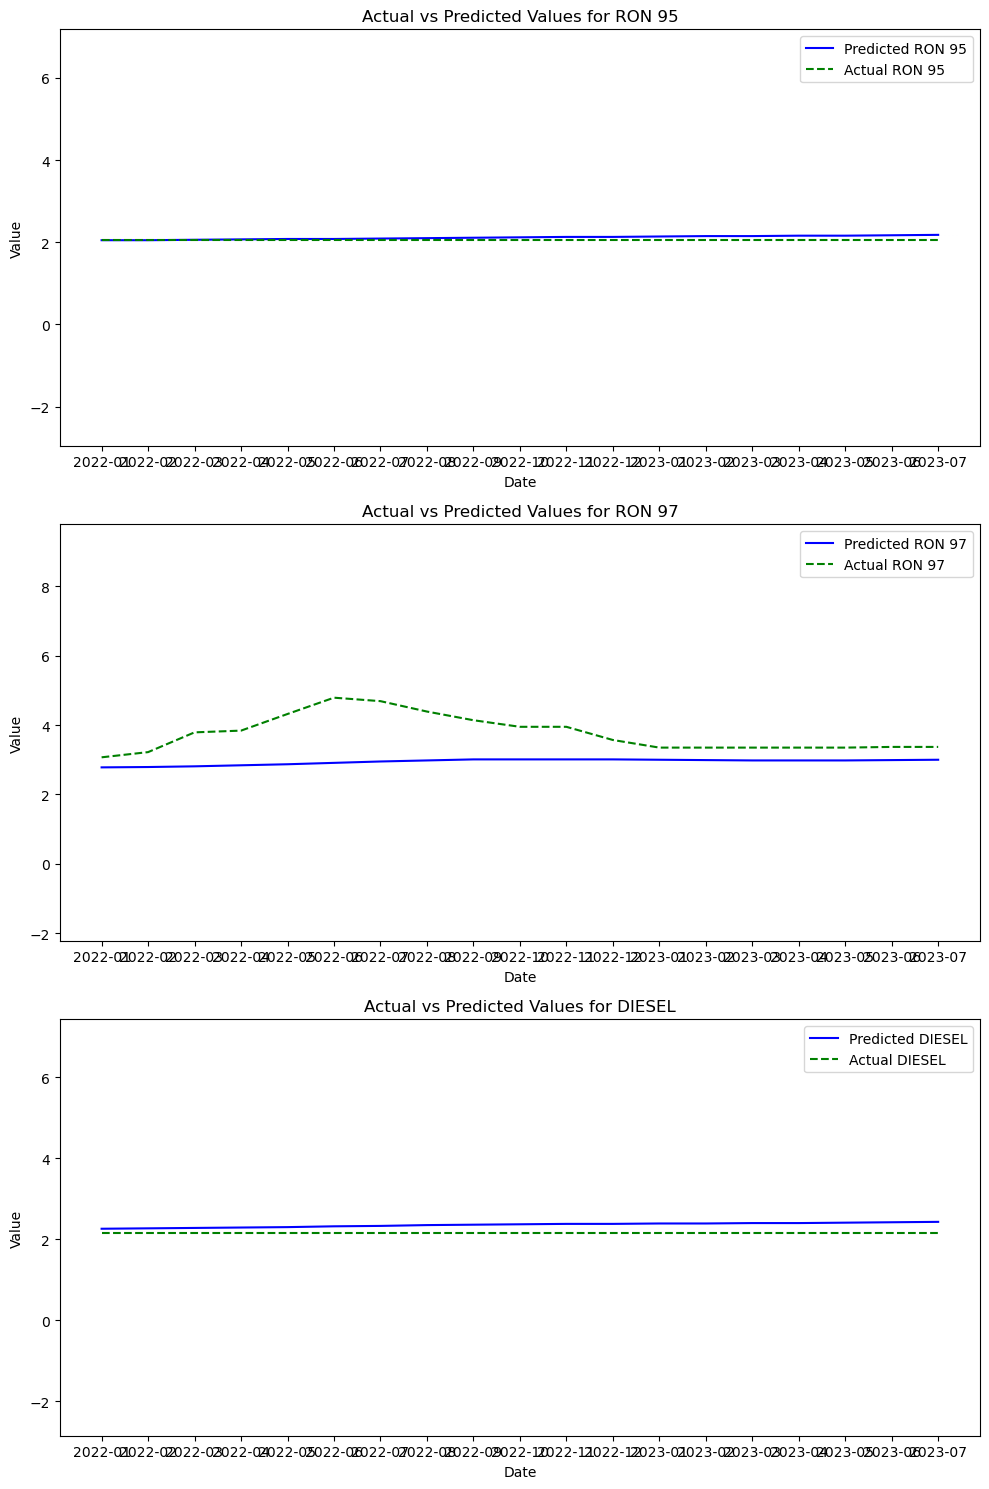

In [24]:
# Define the overall figure size
plt.figure(figsize=(10, 15))  # width, height in inches

# Plot for RON 95
plt.subplot(3, 1, 1)
plt.plot(d_original.index, d_original['Predicted_RON_95'], label='Predicted RON 95', color='blue')
plt.plot(d_original.index, d_original['Actual_RON_95'], label='Actual RON 95', linestyle='dashed', color='green')
plt.title('Actual vs Predicted Values for RON 95')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.ylim([min(d_original['Actual_RON_95'].min(), d_original['Predicted_RON_95'].min()) - 5, 
          max(d_original['Actual_RON_95'].max(), d_original['Predicted_RON_95'].max()) + 5])  # Adjust y-limits

# Plot for RON 97
plt.subplot(3, 1, 2)
plt.plot(d_original.index, d_original['Predicted_RON_97'], label='Predicted RON 97', color='blue')
plt.plot(d_original.index, d_original['Actual_RON_97'], label='Actual RON 97', linestyle='dashed', color='green')
plt.title('Actual vs Predicted Values for RON 97')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.ylim([min(d_original['Actual_RON_97'].min(), d_original['Predicted_RON_97'].min()) - 5, 
          max(d_original['Actual_RON_97'].max(), d_original['Predicted_RON_97'].max()) + 5])

# Plot for DIESEL
plt.subplot(3, 1, 3)
plt.plot(d_original.index, d_original['Predicted_DIESEL'], label='Predicted DIESEL', color='blue')
plt.plot(d_original.index, d_original['Actual_DIESEL'], label='Actual DIESEL', linestyle='dashed', color='green')
plt.title('Actual vs Predicted Values for DIESEL')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.ylim([min(d_original['Actual_DIESEL'].min(), d_original['Predicted_DIESEL'].min()) - 5, 
          max(d_original['Actual_DIESEL'].max(), d_original['Predicted_DIESEL'].max()) + 5])

plt.tight_layout()
plt.show()

In [25]:
########################## Hyperparameter Tuning #############################

In [26]:
X_train 

array([[[0.82857143, 0.26315789, 0.75294118, 0.13603831, 0.13313263,
         0.84313725],
        [0.91428571, 0.29102167, 0.8       , 0.1685132 , 0.16584787,
         0.84313725],
        [0.78095238, 0.24767802, 0.63529412, 0.11379002, 0.11267541,
         0.84313725],
        ...,
        [0.78095238, 0.28482972, 0.83529412, 0.18287147, 0.18297791,
         0.82352941],
        [0.78095238, 0.31578947, 0.83529412, 0.22481485, 0.22498621,
         0.83660131],
        [0.78095238, 0.29411765, 0.83529412, 0.33387408, 0.33407537,
         0.83006536]],

       [[0.91428571, 0.29102167, 0.8       , 0.1685132 , 0.16584787,
         0.84313725],
        [0.78095238, 0.24767802, 0.63529412, 0.11379002, 0.11267541,
         0.84313725],
        [0.6952381 , 0.21362229, 0.51764706, 0.11909228, 0.11879723,
         0.83660131],
        ...,
        [0.78095238, 0.31578947, 0.83529412, 0.22481485, 0.22498621,
         0.83660131],
        [0.78095238, 0.29411765, 0.83529412, 0.33387408, 0.334

In [27]:
y_train  

array([[0.78095238, 0.32817337, 0.83529412, 0.34393017, 0.34398014,
        0.81699346],
       [0.78095238, 0.33436533, 0.83529412, 0.32656015, 0.32694845,
        0.81045752],
       [0.78095238, 0.33126935, 0.83529412, 0.29529272, 0.29547821,
        0.82352941],
       [0.78095238, 0.32817337, 0.83529412, 0.2986893 , 0.29879819,
        0.81699346],
       [0.78095238, 0.3126935 , 0.83529412, 0.35370282, 0.35395207,
        0.77777778],
       [0.77142857, 0.25386997, 0.77647059, 0.42278888, 0.42290162,
        0.67320261],
       [0.35238095, 0.11455108, 0.41176471, 0.47620551, 0.47534963,
        0.52287582],
       [0.        , 0.        , 0.        , 0.58759903, 0.58559743,
        0.51633987],
       [0.05714286, 0.01857585, 0.        , 0.63169926, 0.6303308 ,
        0.22875817],
       [0.3047619 , 0.09907121, 0.32941176, 0.61622109, 0.61509343,
        0.18300654],
       [0.40952381, 0.13312693, 0.44705882, 0.71113175, 0.71104421,
        0.05228758],
       [0.4       , 0

In [28]:
X_test 

array([[[0.78095238, 0.31578947, 0.83529412, 0.22481485, 0.22498621,
         0.83660131],
        [0.78095238, 0.29411765, 0.83529412, 0.33387408, 0.33407537,
         0.83006536],
        [0.78095238, 0.32817337, 0.83529412, 0.34393017, 0.34398014,
         0.81699346],
        ...,
        [0.75238095, 0.40557276, 0.8       , 0.60564883, 0.60571641,
         0.01960784],
        [0.75238095, 0.46749226, 0.8       , 0.65857694, 0.65912875,
         0.01960784],
        [0.75238095, 0.44582043, 0.8       , 0.64307112, 0.64320052,
         0.01960784]],

       [[0.78095238, 0.29411765, 0.83529412, 0.33387408, 0.33407537,
         0.83006536],
        [0.78095238, 0.32817337, 0.83529412, 0.34393017, 0.34398014,
         0.81699346],
        [0.78095238, 0.33436533, 0.83529412, 0.32656015, 0.32694845,
         0.81045752],
        ...,
        [0.75238095, 0.46749226, 0.8       , 0.65857694, 0.65912875,
         0.01960784],
        [0.75238095, 0.44582043, 0.8       , 0.64307112, 0.643

In [29]:
y_test 

array([[0.75238095, 0.46749226, 0.8       , 0.66146426, 0.66210809,
        0.02614379],
       [0.75238095, 0.51393189, 0.8       , 0.70495615, 0.70525823,
        0.01960784],
       [0.75238095, 0.69040248, 0.8       , 0.79894738, 0.79951784,
        0.01960784],
       [0.75238095, 0.70588235, 0.8       , 0.81982459, 0.82026051,
        0.01960784],
       [0.75238095, 0.85448916, 0.8       , 0.78010259, 0.78031281,
        0.14379085],
       [0.75238095, 1.        , 0.8       , 0.77529576, 0.77566627,
        0.18300654],
       [0.75238095, 0.96904025, 0.8       , 0.68539471, 0.68607959,
        0.31372549],
       [0.75238095, 0.87616099, 0.8       , 0.72647627, 0.72731307,
        0.33986928],
       [0.75238095, 0.79876161, 0.8       , 0.66780347, 0.66862091,
        0.47058824],
       [0.75238095, 0.73993808, 0.8       , 0.70964085, 0.71007988,
        0.50980392],
       [0.75238095, 0.73993808, 0.8       , 0.74330938, 0.7420059 ,
        0.65359477],
       [0.75238095, 0

In [30]:
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [31]:
# Define the model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(LSTM(units=hp.Int('lstm_units', min_value=50, max_value=100, step=10), return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(GRU(units=hp.Int('gru_units', min_value=20, max_value=60, step=10), return_sequences=False))
    model.add(Dropout(rate=hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(Dense(6, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error',
                  metrics=['MAE'])
    return model

In [32]:
# Initialize the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_MAE',
    max_trials=10,  # Number of different configurations to try
    executions_per_trial=1,  # Number of models to train per trial
    directory='hybrid_lstm_gru_tuning',  # Directory to store logs
    project_name='k_tuner_run'
)

Reloading Tuner from hybrid_lstm_gru_tuning/k_tuner_run/tuner0.json


In [33]:
import tensorflow as tf  # Ensure TensorFlow is imported
# Early stopping callback to avoid overfitting
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [34]:
# Execute the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[stop_early])

In [35]:
# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 75)            24600     
                                                                 
 gru (GRU)                   (None, 40)                14040     
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense (Dense)               (None, 6)                 246       
                                                                 
Total params: 38886 (151.90 KB)
Trainable params: 38886 (151.90 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
# Predict the test dataset
y_pred = best_model.predict(X_test)

1/1 [==============================] - 0s 199ms/step


In [37]:
# Calculate RMSE, MAE, and MAPE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Absolute Percentage Error: {mape}")

Root Mean Squared Error: 0.1850428950325248
Mean Absolute Error: 0.13163063250659887
Mean Absolute Percentage Error: 0.7240937925263644


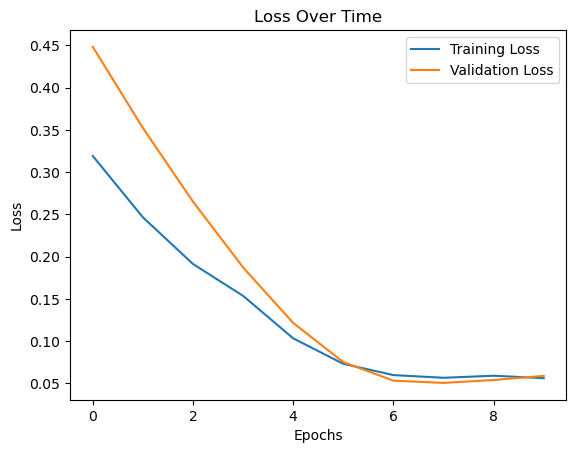

In [38]:
import matplotlib.pyplot as plt

# Assuming history contains training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Time')
plt.legend()
plt.show()

In [39]:
predicted_values = model.predict(X_test)

# Invert scaling for forecasted values
predicted_values_original = target_scaler.inverse_transform(predicted_values)

# Invert scaling for actual test values
actual_values_original = target_scaler.inverse_transform(y_test)

# Replacing scaled data with original data in the DataFrame
d_original = {
    'Predicted_RON_95': predicted_values_original[:, 0],
    'Predicted_RON_97': predicted_values_original[:, 1],
    'Predicted_DIESEL': predicted_values_original[:, 2],
    'Actual_RON_95': actual_values_original[:, 0],
    'Actual_RON_97': actual_values_original[:, 1],
    'Actual_DIESEL': actual_values_original[:, 2]
}

d_original = pd.DataFrame(d_original)
d_original.index = new_data_copy.index[-len(y_test):]  # Assigning the correct date index

1/1 [==============================] - 0s 9ms/step


In [40]:
d_original = d_original.round(2)
d_original

,Predicted_RON_95,Predicted_RON_97,Predicted_DIESEL,Actual_RON_95,Actual_RON_97,Actual_DIESEL
YearMonth,,,,,,
2022-01,2.02,2.77,2.12,2.05,3.07,2.15
2022-02,2.03,2.78,2.12,2.05,3.22,2.15
2022-03,2.03,2.79,2.13,2.05,3.79,2.15
2022-04,2.04,2.80,2.13,2.05,3.84,2.15
2022-05,2.04,2.81,2.13,2.05,4.32,2.15
2022-06,2.05,2.84,2.13,2.05,4.79,2.15
2022-07,2.05,2.88,2.14,2.05,4.69,2.15
2022-08,2.05,2.92,2.14,2.05,4.39,2.15
2022-09,2.05,2.96,2.15,2.05,4.14,2.15


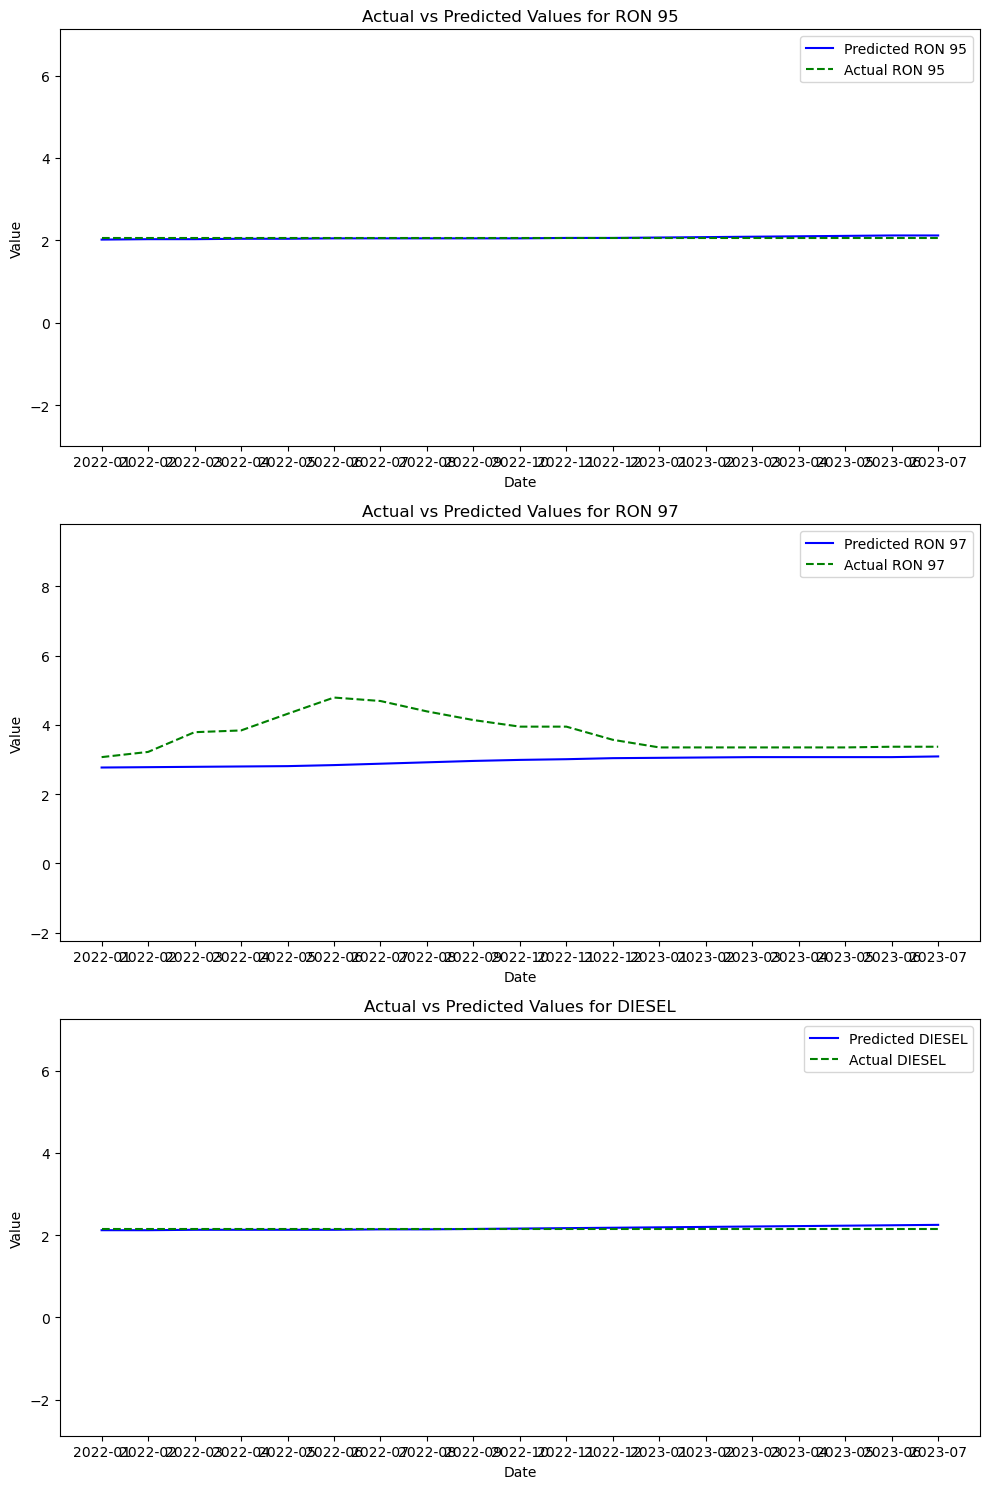

In [41]:
# Define the overall figure size
plt.figure(figsize=(10, 15))  # width, height in inches

# Plot for RON 95
plt.subplot(3, 1, 1)
plt.plot(d_original.index, d_original['Predicted_RON_95'], label='Predicted RON 95', color='blue')
plt.plot(d_original.index, d_original['Actual_RON_95'], label='Actual RON 95', linestyle='dashed', color='green')
plt.title('Actual vs Predicted Values for RON 95')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.ylim([min(d_original['Actual_RON_95'].min(), d_original['Predicted_RON_95'].min()) - 5, 
          max(d_original['Actual_RON_95'].max(), d_original['Predicted_RON_95'].max()) + 5])  # Adjust y-limits

# Plot for RON 97
plt.subplot(3, 1, 2)
plt.plot(d_original.index, d_original['Predicted_RON_97'], label='Predicted RON 97', color='blue')
plt.plot(d_original.index, d_original['Actual_RON_97'], label='Actual RON 97', linestyle='dashed', color='green')
plt.title('Actual vs Predicted Values for RON 97')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.ylim([min(d_original['Actual_RON_97'].min(), d_original['Predicted_RON_97'].min()) - 5, 
          max(d_original['Actual_RON_97'].max(), d_original['Predicted_RON_97'].max()) + 5])

# Plot for DIESEL
plt.subplot(3, 1, 3)
plt.plot(d_original.index, d_original['Predicted_DIESEL'], label='Predicted DIESEL', color='blue')
plt.plot(d_original.index, d_original['Actual_DIESEL'], label='Actual DIESEL', linestyle='dashed', color='green')
plt.title('Actual vs Predicted Values for DIESEL')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.ylim([min(d_original['Actual_DIESEL'].min(), d_original['Predicted_DIESEL'].min()) - 5, 
          max(d_original['Actual_DIESEL'].max(), d_original['Predicted_DIESEL'].max()) + 5])

plt.tight_layout()
plt.show()

In [42]:
###################### forecasting for future #########################

In [43]:
# Function to make recursive predictions
def forecast_future(model, input_data, n_steps):
    future_preds = []
    last_input = input_data
    for _ in range(n_steps):
        # Predict the next step
        next_pred = model.predict(last_input[np.newaxis, :, :])
        
        # Store the prediction
        future_preds.append(next_pred[0])
        
        # Update the last input to include the new prediction
        last_input = np.vstack([last_input[1:], next_pred])
    
    return np.array(future_preds)

In [44]:
# Ensure the index is a datetime type
if not pd.api.types.is_datetime64_any_dtype(new_data_copy.index):
    new_data_copy.index = pd.to_datetime(new_data_copy.index)

In [45]:
# Number of future steps to predict
n_future_steps = 12  # For 12 months

In [46]:
# Last available input data
last_input_data = X_test[-1]

In [47]:
# Generate future predictions
future_predictions = forecast_future(best_model, last_input_data, n_future_steps)

1/1 [==============================] - 0s 7ms/step


In [48]:
# Assuming you have a target_scaler from your initial scaling step
future_predictions_original = target_scaler.inverse_transform(future_predictions)

In [49]:
# Creating a DataFrame to store the future predictions with corresponding dates
future_dates = pd.date_range(start=new_data_copy.index[-1] + pd.DateOffset(months=1), periods=n_future_steps, freq='M')
future_df = pd.DataFrame(future_predictions_original, index=future_dates, columns=['RON 95', 'RON 97', 'DIESEL', 'selling_gold_price', 'buying_gold_price', 'Overnight_Interest_Rate'])

In [50]:
future_df= future_df.round(2)

In [51]:
future_df

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
2023-08-31,2.12,3.09,2.25,8588.879883,8931.650391,2.35
2023-09-30,2.13,3.09,2.26,8594.070312,8969.070312,2.35
2023-10-31,2.14,3.10,2.27,8591.769531,9010.370117,2.35
2023-11-30,2.15,3.11,2.28,8588.320312,9052.349609,2.36
2023-12-31,2.16,3.12,2.28,8585.750000,9092.379883,2.36
2024-01-31,2.17,3.14,2.29,8584.690430,9128.860352,2.36
2024-02-29,2.17,3.15,2.29,8585.269531,9161.509766,2.36
2024-03-31,2.18,3.16,2.30,8587.330078,9190.219727,2.36
2024-04-30,2.18,3.17,2.30,8590.639648,9215.250000,2.36
2024-05-31,2.18,3.18,2.30,8594.929688,9237.019531,2.36


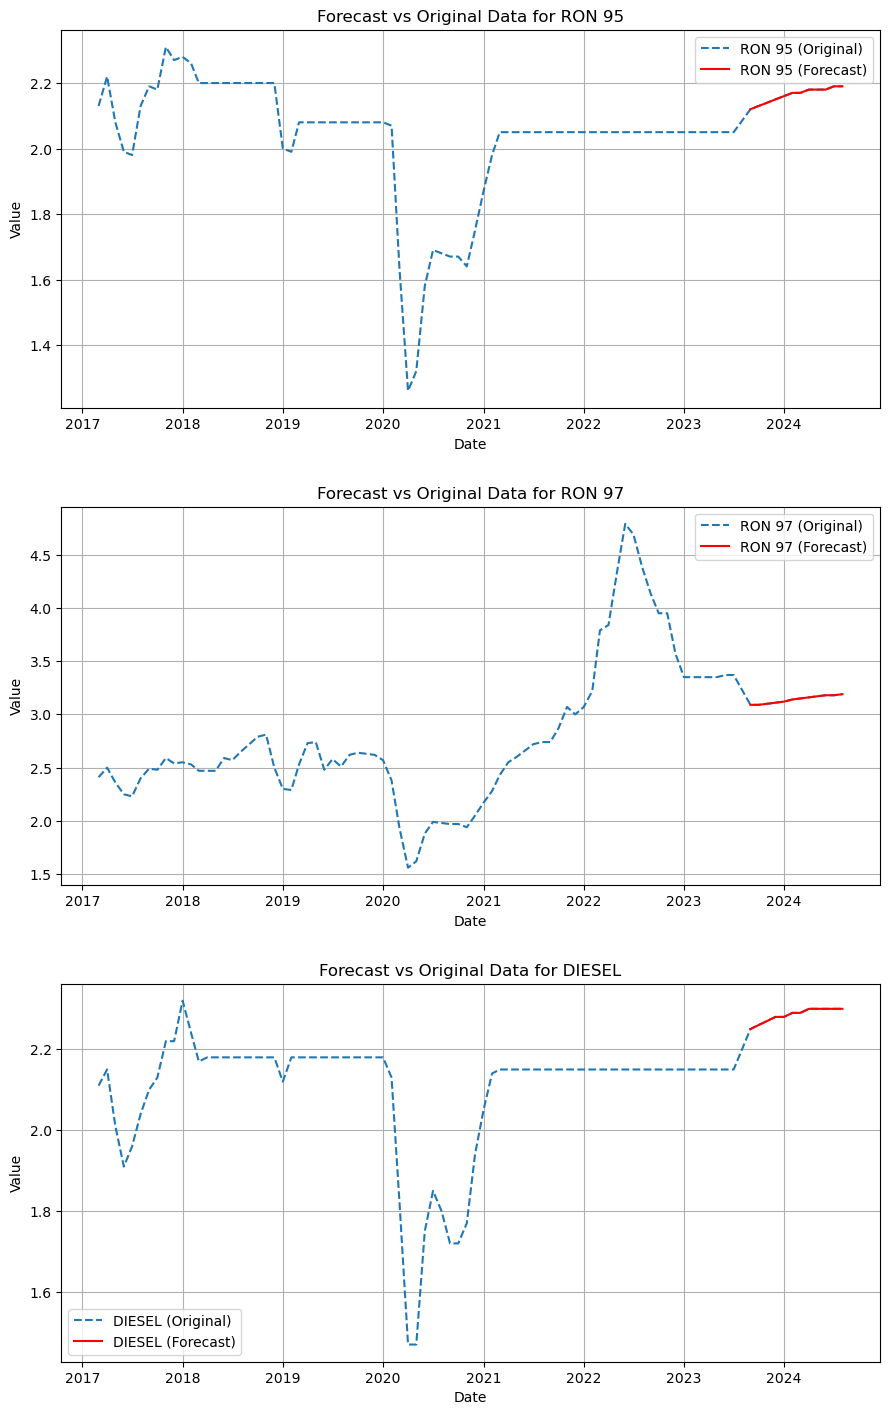

In [52]:
# Combine original and forecasted data into a single DataFrame
combined_df = pd.concat([new_data_copy, future_df])

# Define the figure for subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))  # 3 rows for three variables, each in a separate subplot
fig.tight_layout(pad=5.0)  # Adds space between plots

# Variables to plot
variables = ['RON 95', 'RON 97', 'DIESEL']

# Plotting each variable in a separate subplot
for i, var in enumerate(variables):
    # Plot original data
    axes[i].plot(combined_df.index, combined_df[var], label=var + ' (Original)', linestyle='dashed')
    
    # Plot forecasted data if available
    if var in future_df.columns:
        axes[i].plot(future_df.index, future_df[var], label=var + ' (Forecast)', color='red')
    
    axes[i].set_title(f'Forecast vs Original Data for {var}')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel('Value')
    axes[i].legend()
    axes[i].grid(True)

plt.show()